## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [2]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
def get_data(data_path: str):
  data = pd.read_csv(data_path)
  return data


print("Basic statistical information for numerical variables:")
print(data.describe())

Basic statistical information for numerical variables:
            index                           date            yr          mnth  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      0.502561      6.537775   
min        1.0000            2011-01-01 00:00:00      0.000000      1.000000   
25%     4345.5000            2011-07-04 00:00:00      0.000000      4.000000   
50%     8690.0000            2012-01-02 00:00:00      1.000000      7.000000   
75%    13034.5000            2012-07-02 00:00:00      1.000000     10.000000   
max    17379.0000            2012-12-31 00:00:00      1.000000     12.000000   
std     5017.0295                            NaN      0.500008      3.438776   

                 hr       holiday       weekday    workingday    weathersit  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean      11.546752      0.028770      3.003683      0.682721     

In [4]:
data = get_data(data_path="motorbike_ambulance_calls.csv")


print("\nMaximum values for all variables:")
print(data.max())

print("\nMinimum values for all variables:")
print(data.min())

print("\nDimensionality of the dataset:")
print(data.shape)


Maximum values for all variables:
index          17379
date          9/9/12
season        winter
yr                 1
mnth              12
hr                23
holiday            1
weekday            6
workingday         1
weathersit         4
temp             1.0
atemp            1.0
hum              1.0
windspeed     0.8507
cnt              977
dtype: object

Minimum values for all variables:
index              1
date          1/1/11
season        autumn
yr                 0
mnth               1
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         1
temp            0.02
atemp            0.0
hum              0.0
windspeed        0.0
cnt                1
dtype: object

Dimensionality of the dataset:
(17379, 15)


**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [5]:
print("Data types:")
print(data.dtypes)

print("\nNumber of data for each variable:")
print(data.count())

Data types:
index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

Number of data for each variable:
index         17379
date          17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [6]:
missing_values = data.isnull().any()

print("Presence of missing values in variables:")
print(missing_values)

Presence of missing values in variables:
index         False
date          False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
cnt           False
dtype: bool


**Висновки з 1-3 завдання (детальні)**



1. Аналізуючи статистичну інформацію про числові змінні, отримуємо загальне уявлення про наші дані - як вони розподілені та які максимальні та мінімальні значення. Також розмірність датасету показала, скільки ми маємо спостережень та яку кількість характеристик розглядаємо. 

2. Перевірка типів даних та кількості даних для кожної змінної дає нам інформацію про те, які дані доступні та як вони представлені.

3. Аналіз пропусків в даних показує, чи втрачена частина інформації. Виявлення пропусків важливе, оскільки це може вказати на проблеми з якістю даних або необхідність додаткової обробки перед аналізом.



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [7]:
import pandas as pd

def tranform_date(df: pd.DataFrame, date_col_name: str):
    df[date_col_name] = pd.to_datetime(df[date_col_name])
    
    min_date = df[date_col_name].min()
    max_date = df[date_col_name].max()
    print("Minimum date in the dataset:", min_date)
    print("Maximum date in the dataset:", max_date)
    
    return df

data = tranform_date(data, 'date')


Minimum date in the dataset: 2011-01-01 00:00:00
Maximum date in the dataset: 2012-12-31 00:00:00


/var/folders/ds/f8dpwy517y386kvymrw8pj100000gn/T/ipykernel_31531/859681426.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col_name] = pd.to_datetime(df[date_col_name])


In [8]:
import pandas as pd

def get_time_limits(df: pd.DataFrame, date_col_name: str):
    first_day = df[date_col_name].min()
    last_day = df[date_col_name].max()
    print(f"First day of dataset - {first_day}.\nLast day of dataset - {last_day}")

get_time_limits(data, 'date')


First day of dataset - 2011-01-01 00:00:00.
Last day of dataset - 2012-12-31 00:00:00


In [20]:
print(data.head())
print(data.info())

for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in a variable '{column}': {unique_values}")

categorical_columns = [col for col in data.columns if data[col].dtype == 'object']
print("Categorical variables:", categorical_columns)


   index       date season  yr  mnth  hr  holiday  weekday  workingday  \
0      1 2011-01-01      1   0     1   0        0        6           0   
1      2 2011-01-01      1   0     1   1        0        6           0   
2      3 2011-01-01      1   0     1   2        0        6           0   
3      4 2011-01-01      1   0     1   3        0        6           0   
4      5 2011-01-01      1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  cnt  
0           1  0.24  0.2879  0.81        0.0   16  
1           1  0.22  0.2727  0.80        0.0   40  
2           1  0.22  0.2727  0.80        0.0   32  
3           1  0.24  0.2879  0.75        0.0   13  
4           1  0.24  0.2879  0.75        0.0    1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       17379 non-null  int64

In [ ]:
#Перетворивши змінну date у date , ми змогли визначити першу та останню дати у датасеті. Це дозволяє нам краще зрозуміти часовий період, за який ми маємо дані.

#Аналіз категоріальних змінних 


**Завдання 5** виділити категоріальні змінні в окремий датасет


In [10]:
data_categorical = data.select_dtypes(include=['object'])

print(data_categorical.head())

   season
0  spring
1  spring
2  spring
3  spring
4  spring


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [11]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

def encode_season(df: pd.DataFrame, season_col_name: str):
    season_mapping = {"spring": 1, "summer": 2, "autumn": 3, "winter": 4}
    df[season_col_name] = df[season_col_name].replace(season_mapping)
    return df

data = encode_season(data, 'season')


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

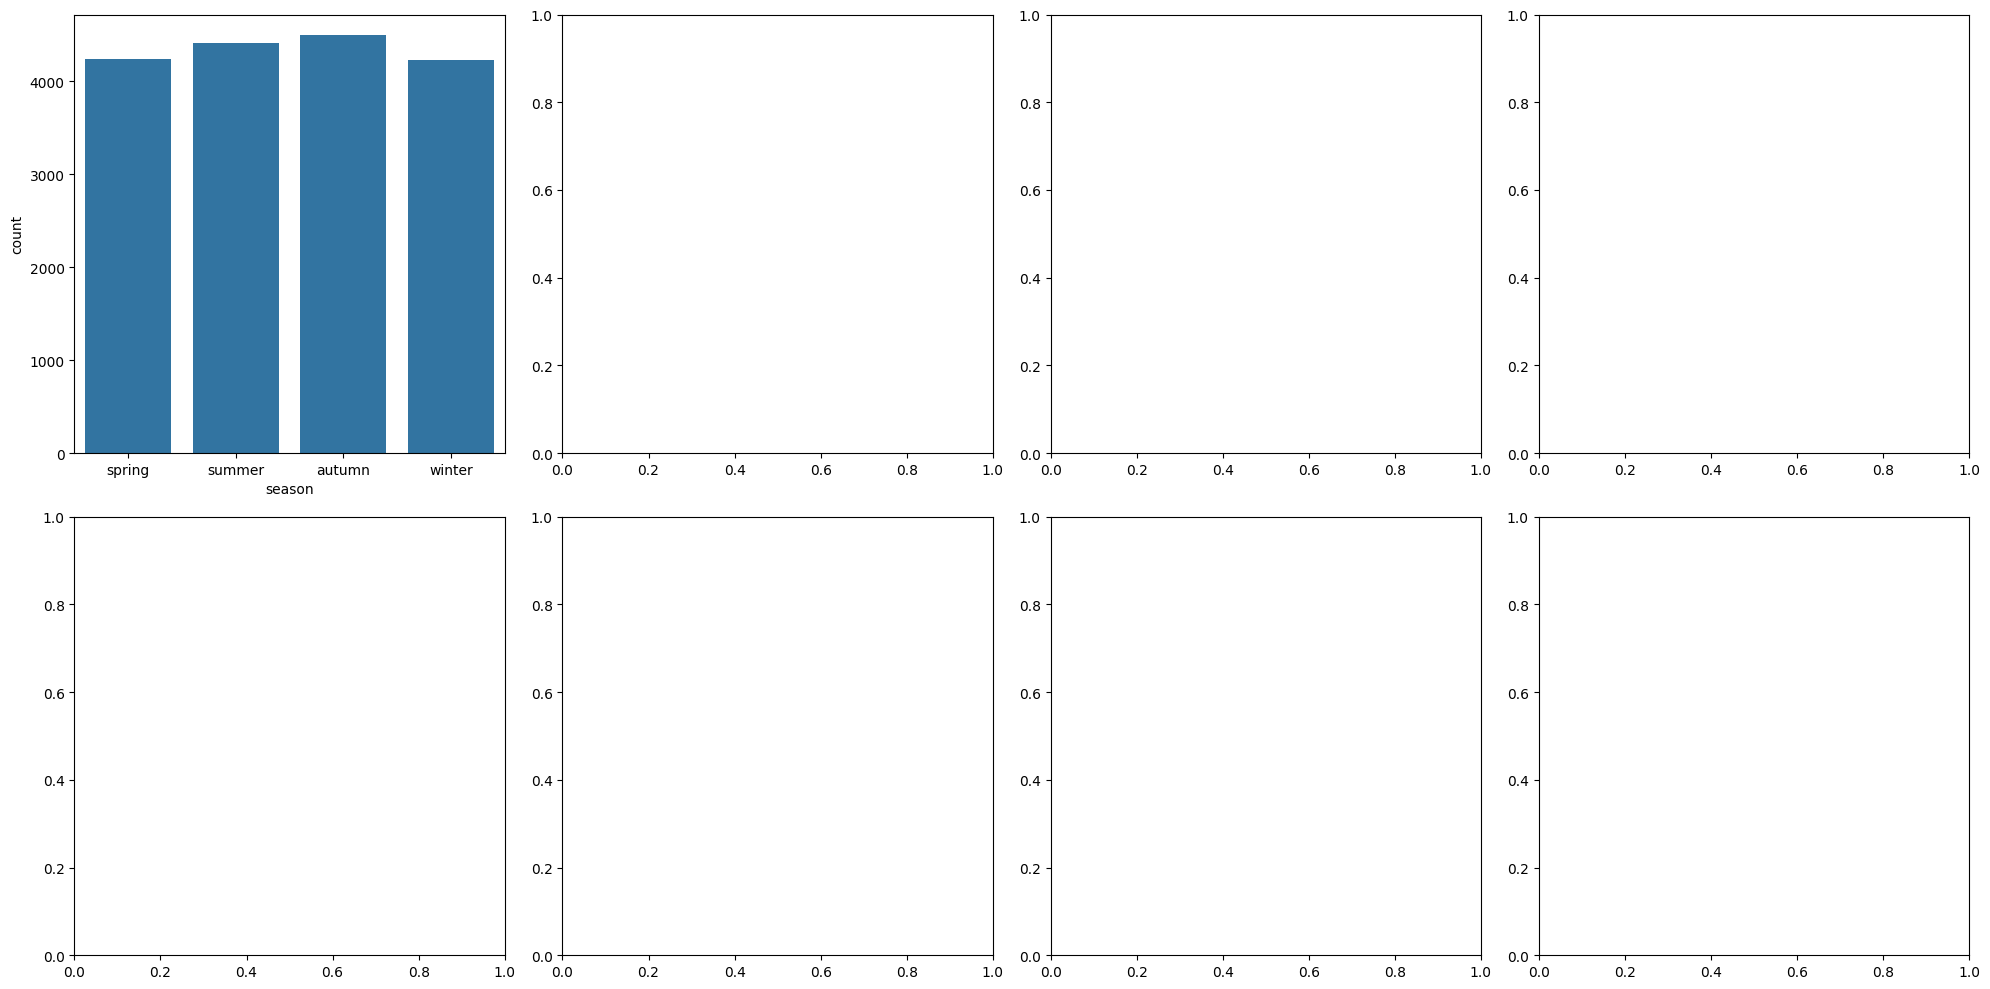

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 4, figsize=(20, 10))


for variable, subplot in zip(data_categorical.columns, ax.flatten()):
    sns.countplot(x=variable, data=data_categorical, ax=subplot)


plt.tight_layout()
plt.show()


**Висновки з 5-7 завдання (детальні)**

1. Було створено окремий датасет data_categorical, в якому зберігаються лише категоріальні змінні, щоб зручно провести їх аналіз.
  
2. Було перетворено змінну season з об'єктного типу на числовий, щоб покращити обробку даних та аналіз. 

3. Графік countplot, відображає розподіл кількості спостережень для кожної категорії у категоріальних змінних.

#Аналіз числових змінних



**Завдання 8** виділити числові змінні в окремий датасет

In [13]:
data_numerical = data.select_dtypes(include=['int64', 'float64'])


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

IndexError: index 2 is out of bounds for axis 0 with size 2

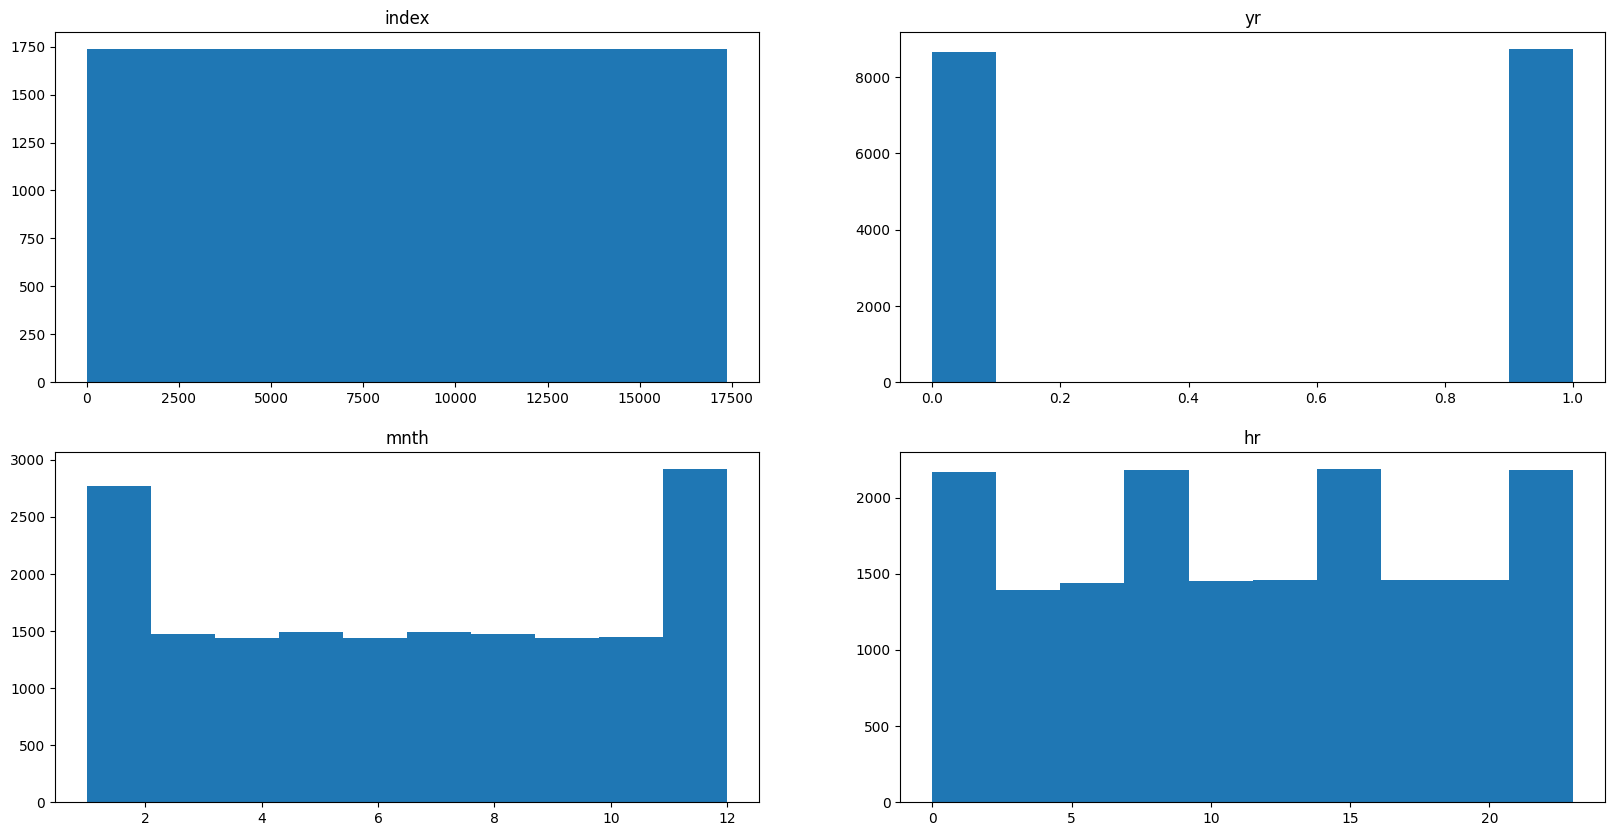

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(20, 10))

for i, column in enumerate(data_numerical.columns):
    row = i // 2
    col = i % 2
    ax[row, col].hist(data_numerical[column])
    ax[row, col].set_title(column)

plt.tight_layout()
plt.show()


**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

Slope factor: 0.010064609532772014


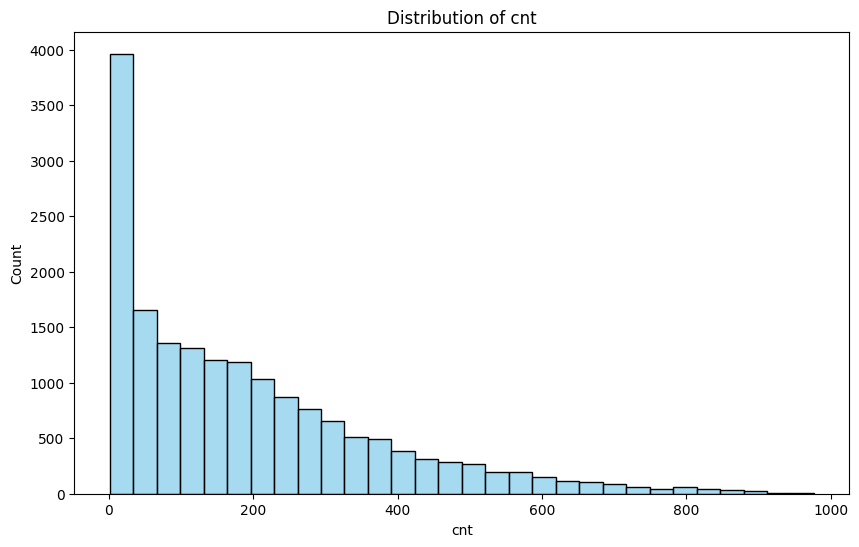

In [21]:
import seaborn as sns
from scipy.stats import linregress

plt.figure(figsize=(10, 6))
sns.histplot(data['cnt'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of cnt')

slope, intercept, r_value, p_value, std_err = linregress(data.index, data['cnt'])
print("Slope factor:", slope)

plt.show()


**Висновки з 8-10 завдання (детальні)**

1. Створення датасету з числовими змінними,це дозволяє зосередитися лише на цілях аналізу цих типів даних, полегшуючи їхнє подальше оброблення.   
2. Гістограми розподілк допомагають візуалізувати розподіл кожної числової змінної та виявити особливості їхнього розподілу, такі як асиметрія, викиди або концентрація даних в певних діапазонах. 
3. Гістограма розподілу цільової змінної cnt показує, як розподіляються значення цільової змінної. Такожт було розраховано коефіцієнт нахилу для лінійної регресії між індексами і значеннями cnt.



#Аналіз взаємозв'язків між числовими і категоріальними змінними


**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

IndexError: index 3 is out of bounds for axis 0 with size 3

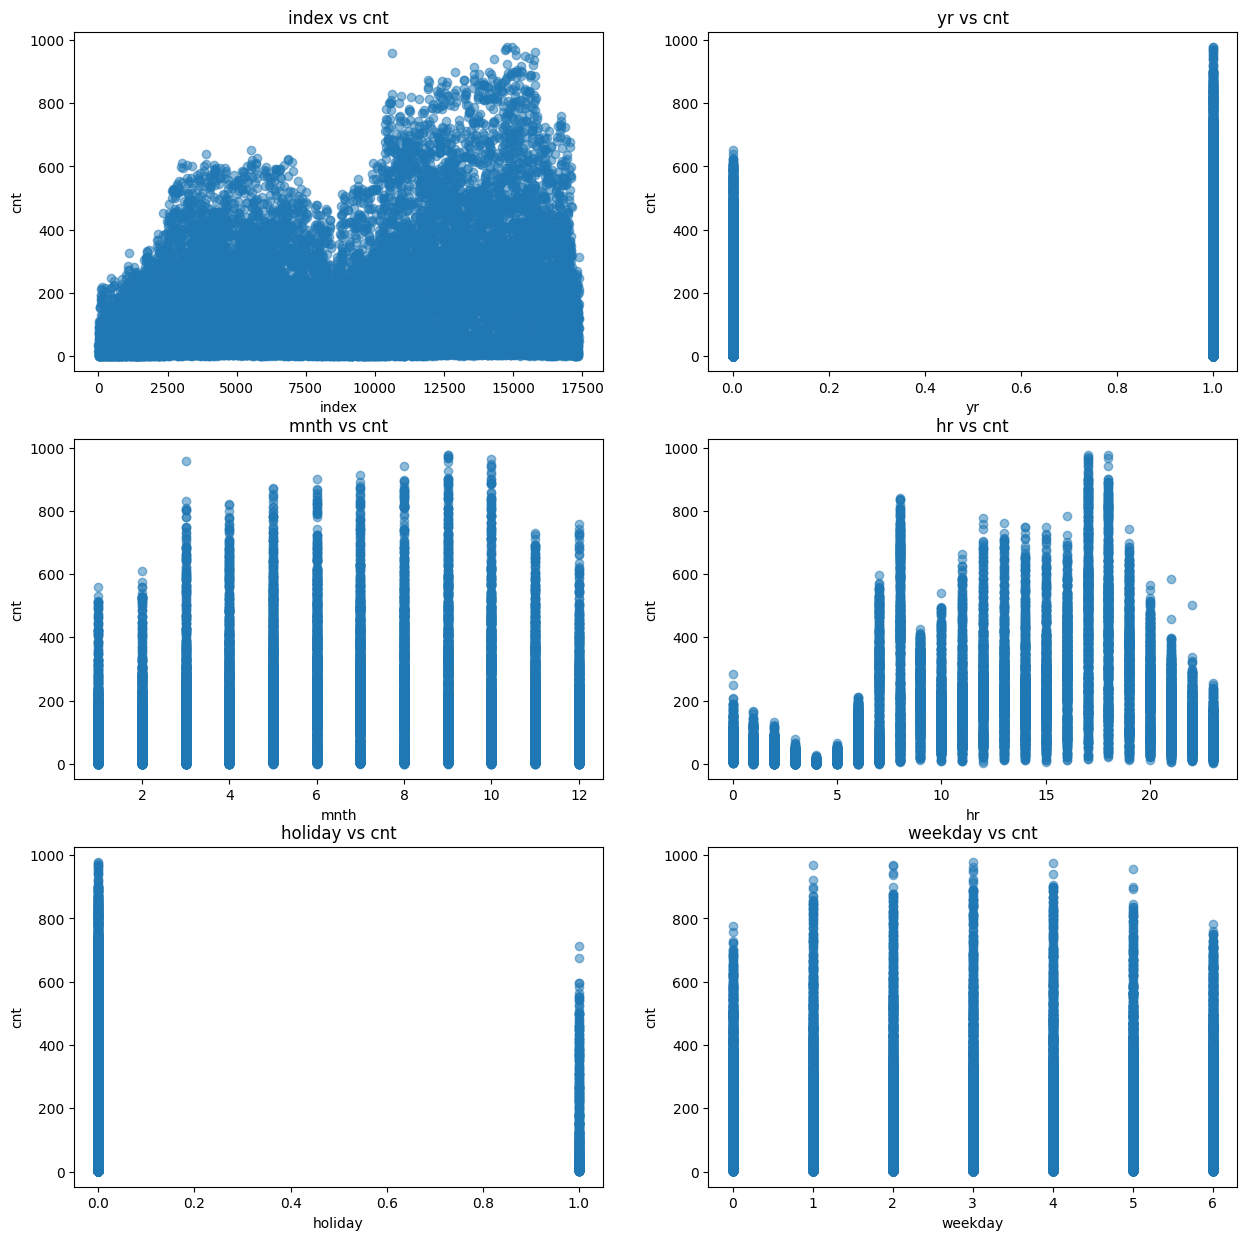

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 2, figsize=(15, 15))

for i, column in enumerate(data_numerical.drop('cnt', axis=1).columns):
    row = i // 2
    col = i % 2
    ax[row, col].scatter(data_numerical[column], data_numerical['cnt'], alpha=0.5)
    ax[row, col].set_title(f'{column} vs cnt')
    ax[row, col].set_xlabel(column)
    ax[row, col].set_ylabel('cnt')


plt.tight_layout()
plt.show()

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

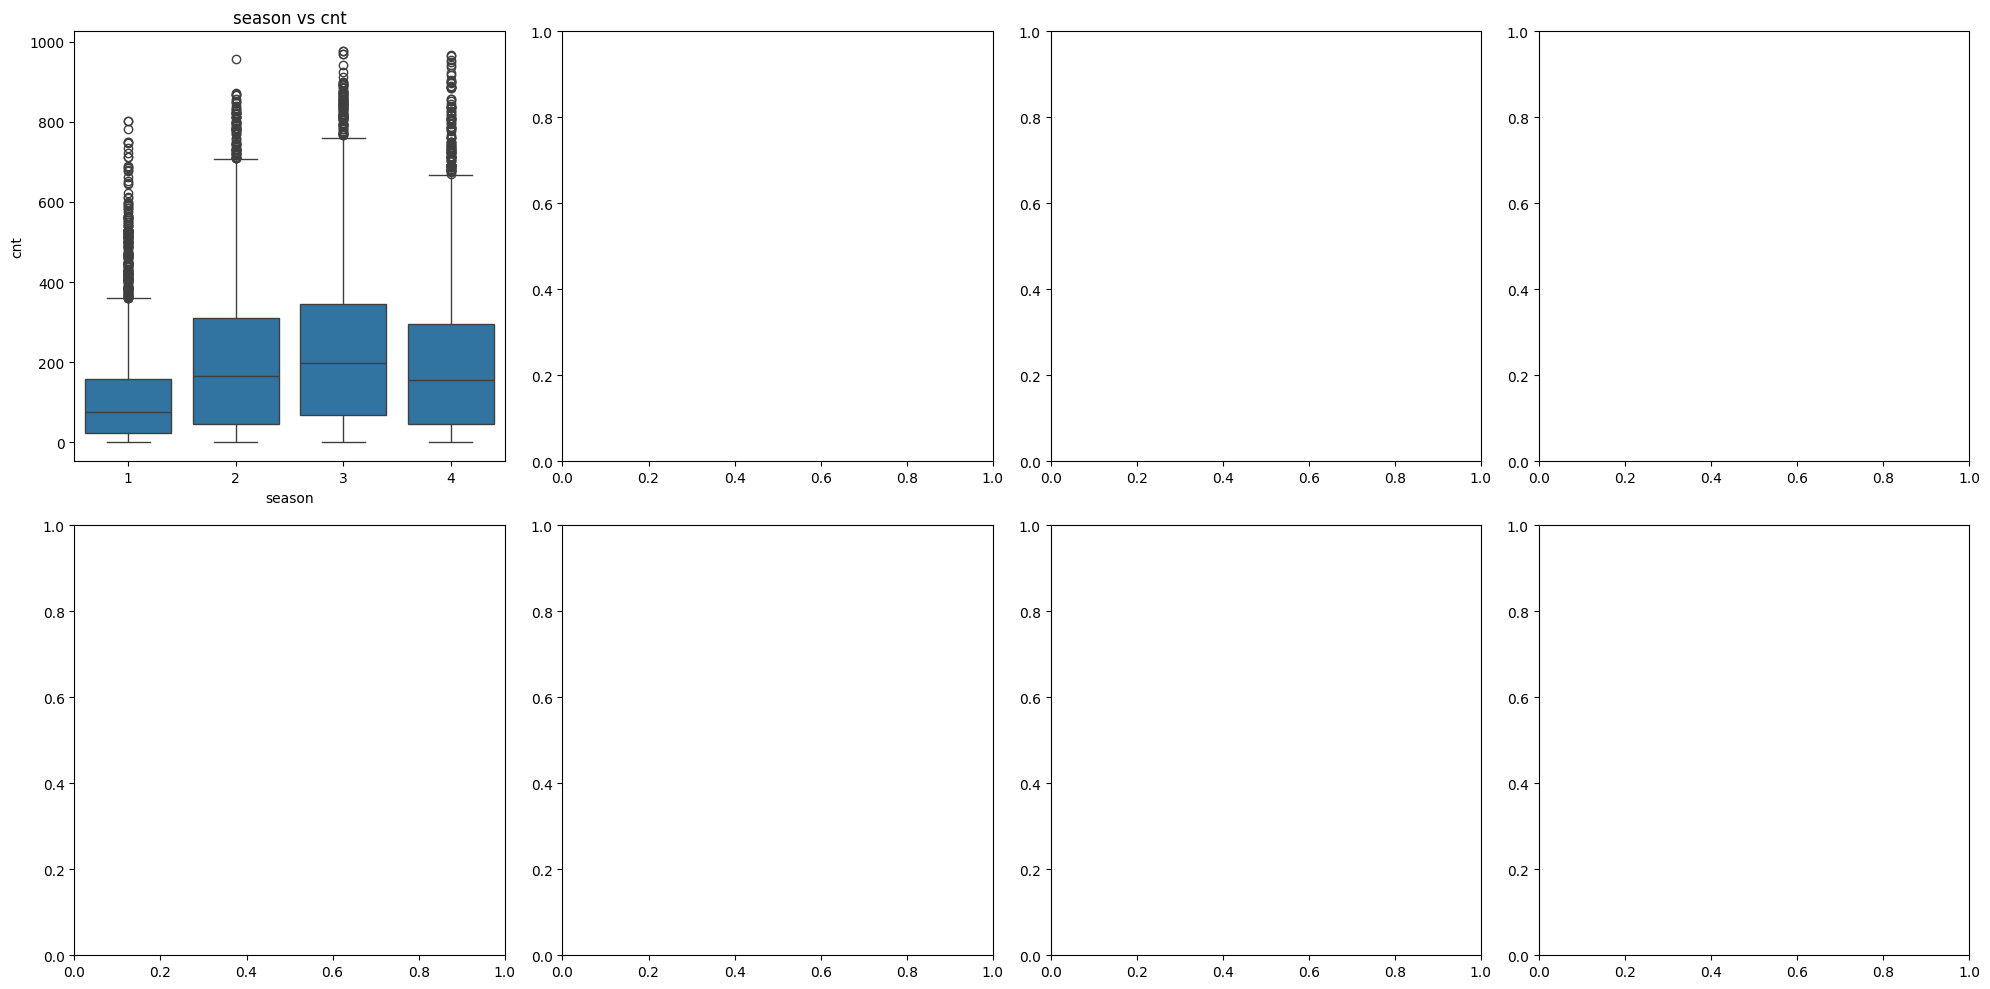

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 4, figsize=(20, 10))

for i, column in enumerate(data_categorical.columns):
    row = i // 4
    col = i % 4
    sns.boxplot(x=column, y='cnt', data=data, ax=ax[row, col])
    ax[row, col].set_title(f'{column} vs cnt')

plt.tight_layout()
plt.show()

**Висновки з 11-12 завдання (детальні)**



1. Побудовано графіки scatterplot між кожною числовою змінною і цільовою змінною 'cnt'.
Ці графіки дозволяють оцінити взаємозв'язок між кожною числовою змінною і кількістю велосипедів, використаних протягом години.

2. Побудовано графік boxplot між кожною категоріальною змінною і цільовою змінною 'cnt'.
Цe дозволяє порівняти розподіл кількості велосипедів для різних категорій кожної змінної.

 




**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

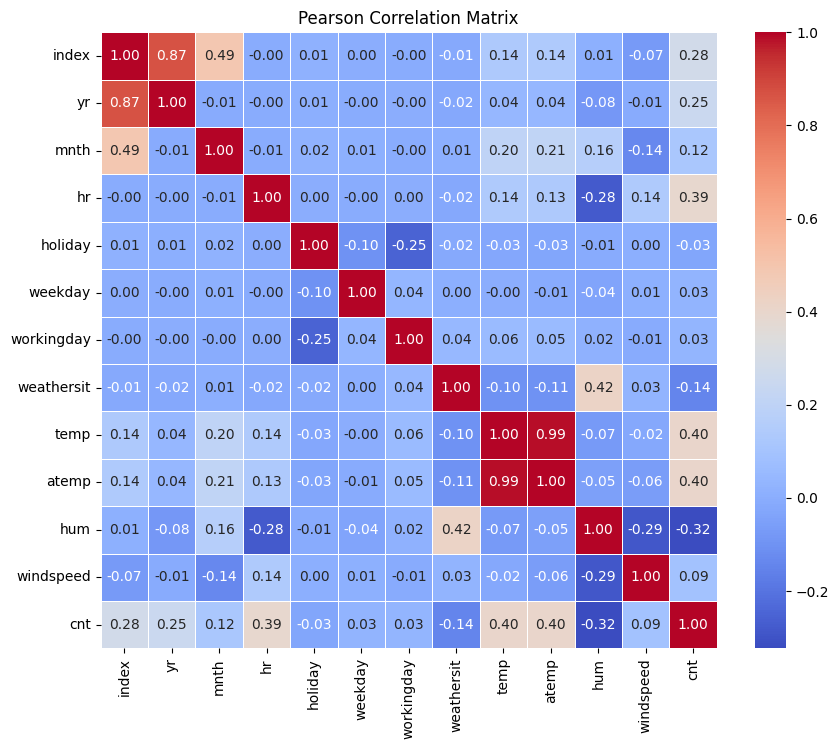

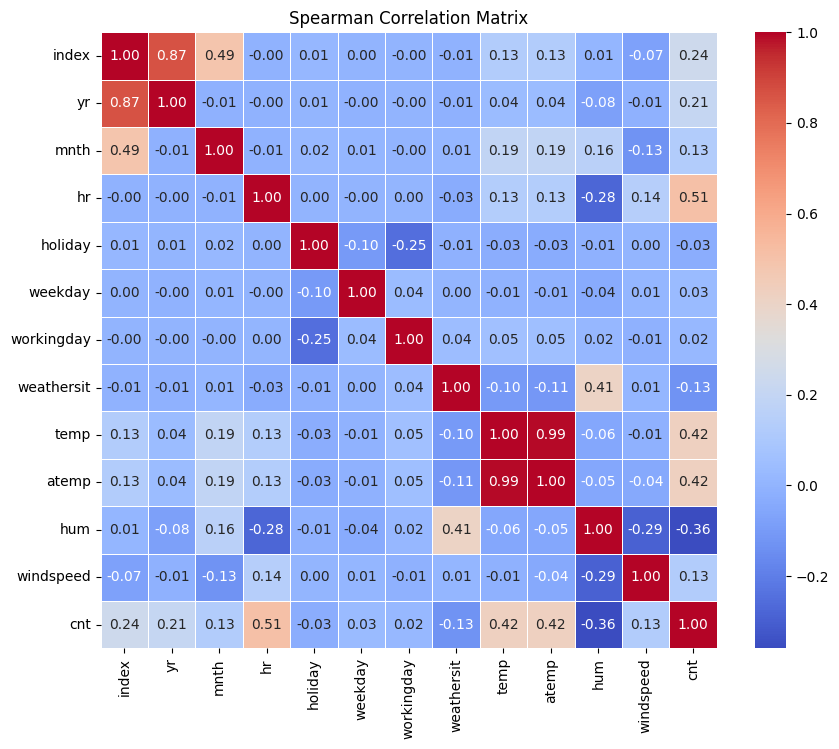

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

pearson_corr = data_numerical.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.show()

spearman_corr = data_numerical.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.show()


In [ ]:


#Метод Пірсона показав, що деякі змінні мають помірну залежність, тоді як метод Спірмена виявив більше суттєвих взаємозв'язків, включаючи нелінійні. 
#Обидва методи підтверджують певні зв'язки між даними, проте метод Спірмена чутливіший до різноманітних типів залежностей.

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def get_dummies(df):
    features = pd.concat([df,
                          pd.get_dummies(df['season']),
                          pd.get_dummies(df['mnth']),
                          pd.get_dummies(df['weekday']),
                          pd.get_dummies(df['weathersit'])
                          ], axis=1)
    features = features.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1)
    return features


/var/folders/ds/f8dpwy517y386kvymrw8pj100000gn/T/ipykernel_31301/3965460248.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
features = get_dummies(data)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [2]:
def create_night_hours(df):
    df['night_hours'] = df['hr'].apply(lambda x: 1 if (x >= 0 and x <= 6) or x == 23 else 0)
    df = df.drop('hr', axis=1)
    return df

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [6]:

features_lr = features.drop(['spring', 'mnth_1', 'weekday_0', 'weathersit_1', 'hr_0', 'atemp', 'date'], axis=1)


NameError: name 'features' is not defined

In [7]:
def get_train_data(df, target, test_size):
    X = df.drop(target, axis=1)
    y = df[target]
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)
    X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)
    return X_train, X_validation, X_test, y_train, y_validation, y_test


In [8]:
X_train, X_validation, X_test, y_train, y_validation, y_test = get_train_data(features_lr, 'cnt', 0.3)


NameError: name 'features_lr' is not defined

In [9]:
def train_linear_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

model = train_linear_model(X_train, y_train)


NameError: name 'X_train' is not defined

In [12]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('MSE train: {:.3f}, test: {:.3f}'.format(
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
    r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))

NameError: name 'model' is not defined

Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

In [11]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()
plt.show()

NameError: name 'y_train_pred' is not defined

**Висновки з завдання (детальні)**



1. Були створені фіктивні змінні для категоріальних ознак за допомогою функції get_dummies.
2. Також була створена нова змінна night_hours, яка вказує, чи є година нічною.   
3. Для оцінки моделі було використано середньоквадратичну помилку (MSE) та коефіцієнт детермінації (R^2).

